In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

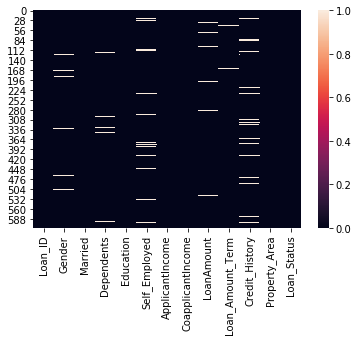

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDADF71748>,
      dtype=object)

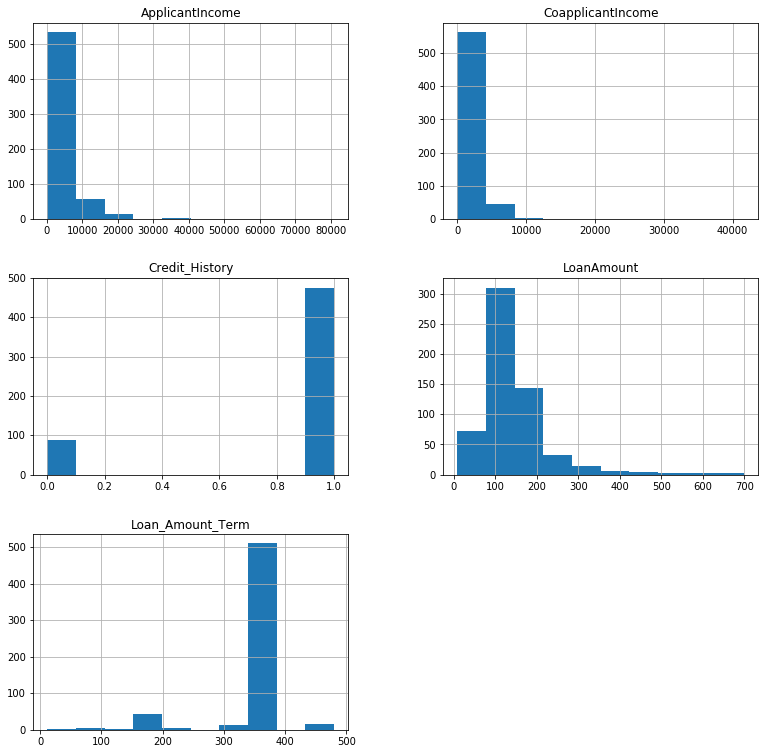

In [11]:
df.hist(figsize=(13,13))

In [12]:
df['Gender'].fillna('Male',inplace=True)
df['Gender'].mode()

0    Male
dtype: object

In [13]:
df['Married'].fillna('yes',inplace=True)
df['Married'].mode()

0    Yes
dtype: object

In [14]:
df['Dependents'].fillna(0,inplace=True)
df['Dependents'].mode()

0    0
dtype: object

In [15]:
df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].mode()

0    No
dtype: object

In [16]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [18]:
df['Credit_History'].fillna(1.0,inplace=True)
df['Credit_History'].mode()

0    1.0
dtype: float64

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [21]:
df_object=df[['Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status']].copy()

In [22]:
df_object.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [23]:
for i in df_object:
      print("column_name = ",i)
      print(df_object[i].value_counts())
      print("\n")

column_name =  Gender
Male      502
Female    112
Name: Gender, dtype: int64


column_name =  Married
Yes    398
No     213
yes      3
Name: Married, dtype: int64


column_name =  Dependents
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64


column_name =  Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


column_name =  Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


column_name =  Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


column_name =  Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




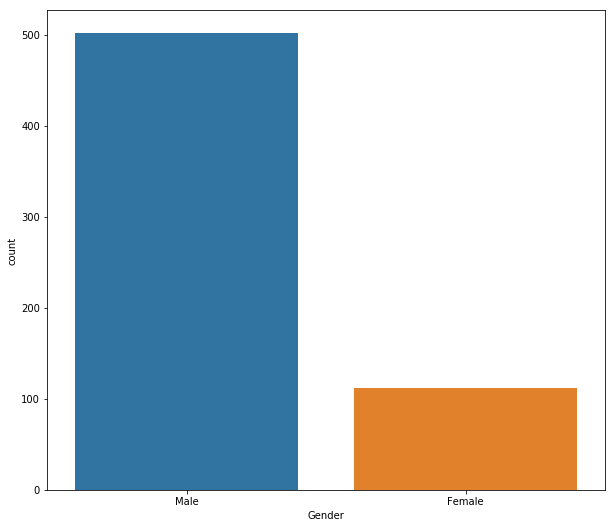

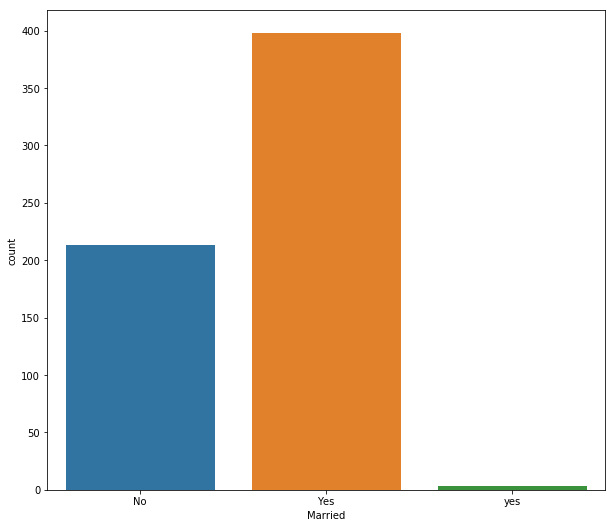

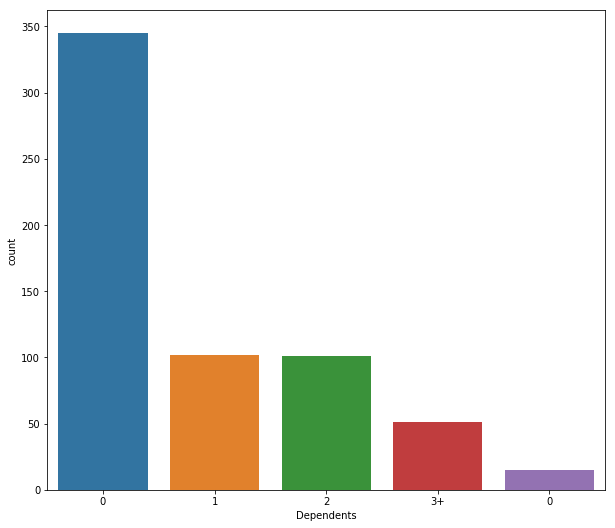

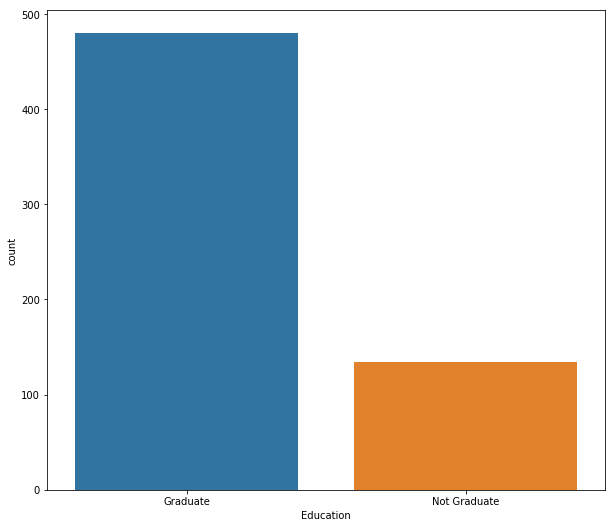

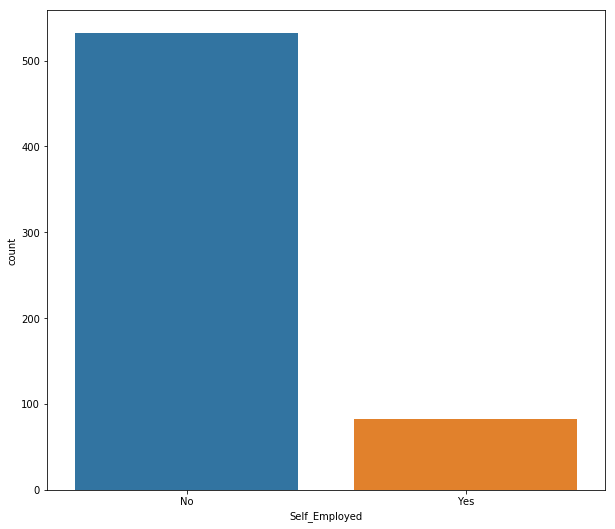

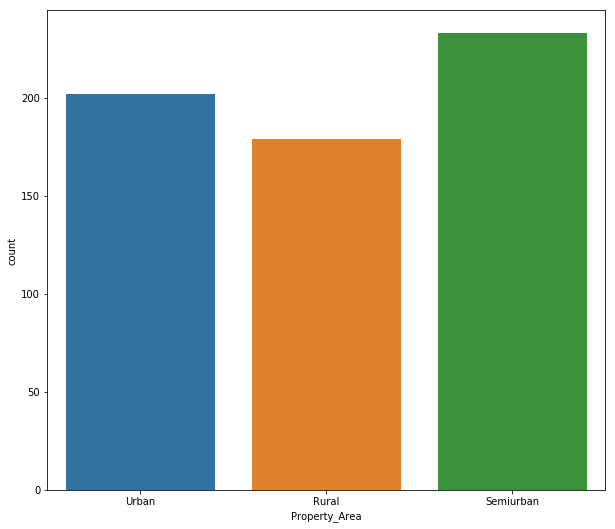

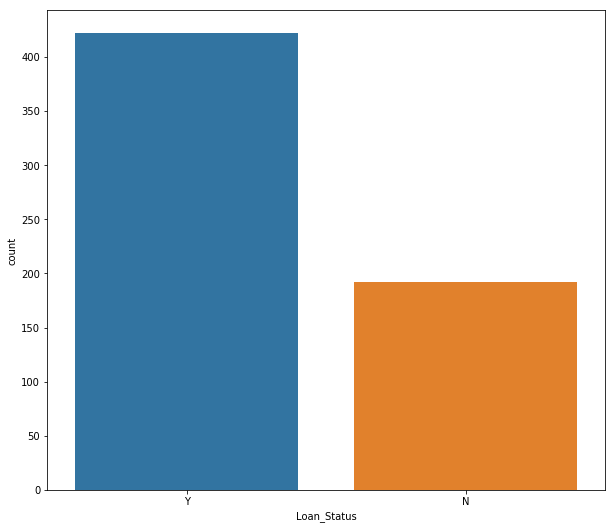

In [24]:
for i in df_object:
    plt.figure(figsize=(10,30))
    plt.subplot(311)
    sns.countplot(df_object[i])

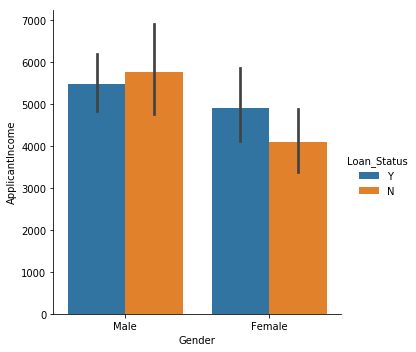

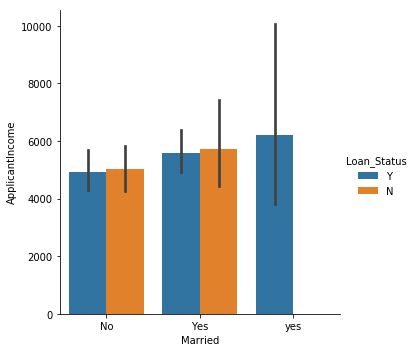

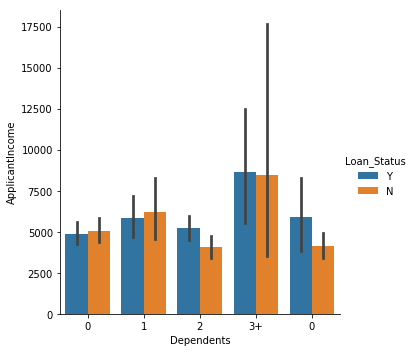

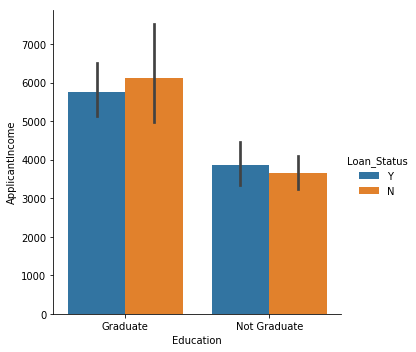

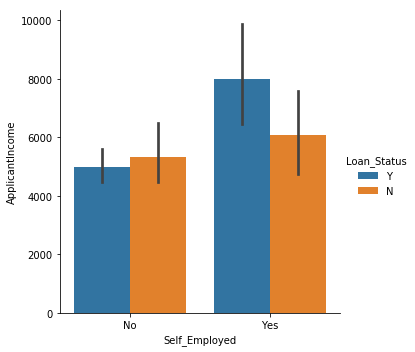

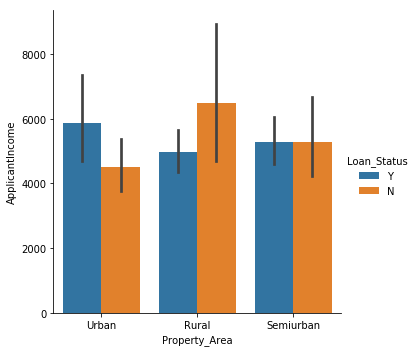

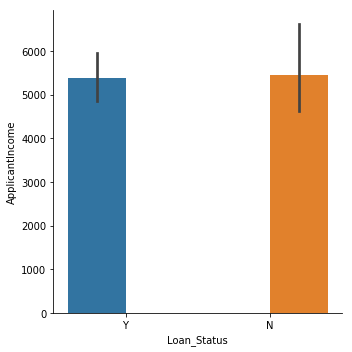

In [25]:
for i in df_object:
    sns.catplot(x=i, y='ApplicantIncome',hue='Loan_Status',data=df,kind="bar")

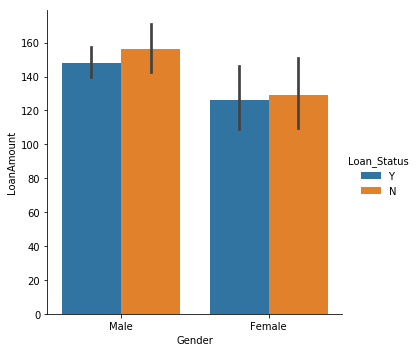

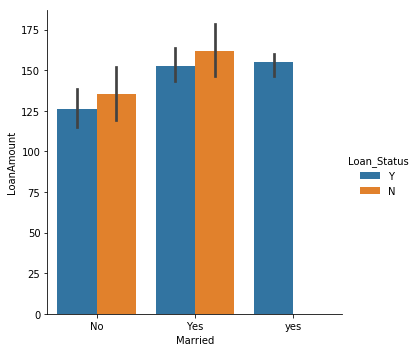

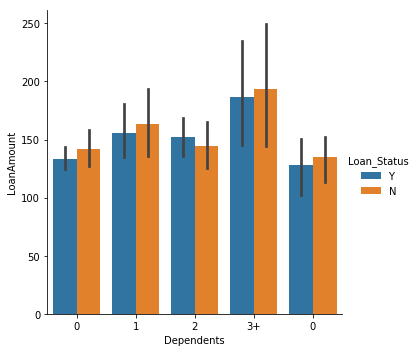

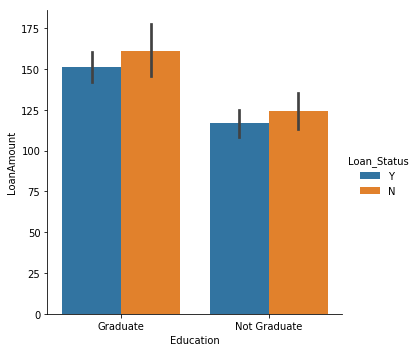

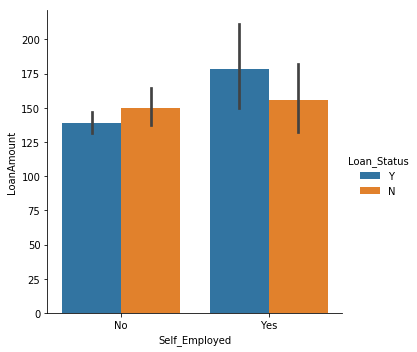

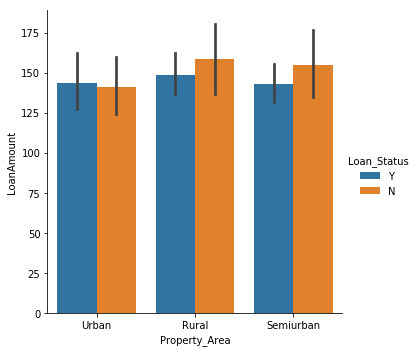

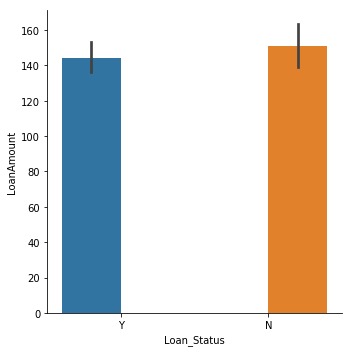

In [26]:
for i in df_object:
    sns.catplot(x=i, y='LoanAmount',hue='Loan_Status',data=df,kind='bar')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_object['Married']=le.fit_transform(df_object['Married'])
df_object['Gender']=le.fit_transform(df_object['Gender'])
df_object['Education']=le.fit_transform(df_object['Education'])
df_object['Self_Employed']=le.fit_transform(df_object['Self_Employed'])
df_object['Loan_Status']=le.fit_transform(df_object['Loan_Status'])

In [28]:
df_object.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,Urban,1
1,1,1,1,0,0,Rural,0
2,1,1,0,0,1,Urban,1
3,1,1,0,1,0,Urban,1
4,1,0,0,0,0,Urban,1


In [29]:
df_object= pd.get_dummies(df_object, drop_first=True)

In [30]:
df_object.head()

,Gender,Married,Education,Self_Employed,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,1,1,0,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,1


In [31]:
df_object.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [32]:
df_int=df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History','ApplicantIncome']]

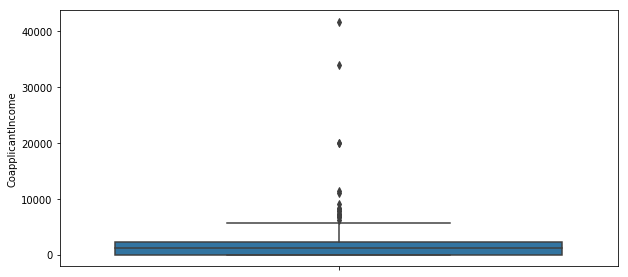

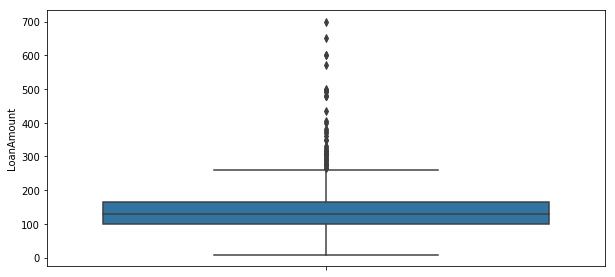

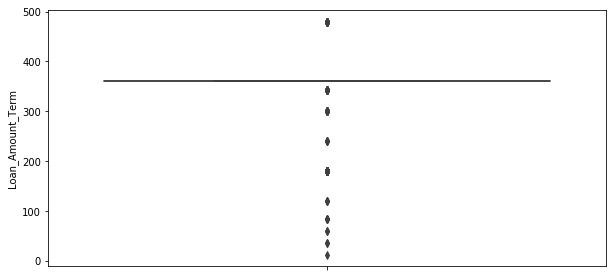

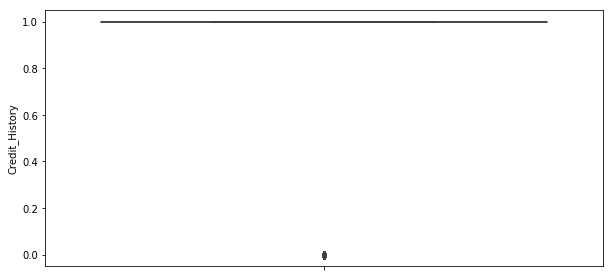

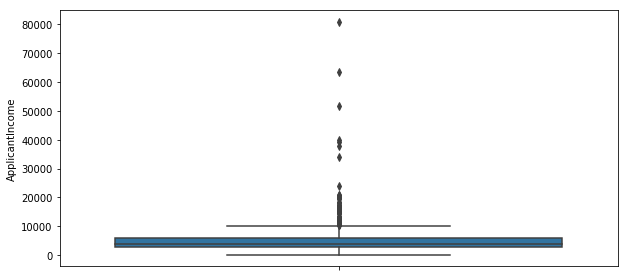

In [33]:
for i in df_int:
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    sns.boxplot(df_int[i],orient='v')

In [34]:
df_final=pd.concat([df_int,df_object],axis=1)
df_final.shape

(614, 16)

In [35]:
x=df_final.drop(['Loan_Status'],axis=1)
x.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Education,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0.0,146.412162,360.0,1.0,5849,1,0,0,0,1,0,0,0,0,1
1,1508.0,128.000000,360.0,1.0,4583,1,1,0,0,0,1,0,0,0,0
2,0.0,66.000000,360.0,1.0,3000,1,1,0,1,1,0,0,0,0,1
3,2358.0,120.000000,360.0,1.0,2583,1,1,1,0,1,0,0,0,0,1
4,0.0,141.000000,360.0,1.0,6000,1,0,0,0,1,0,0,0,0,1


In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [37]:
from sklearn.decomposition import PCA
pca=PCA(8)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [38]:
y=df_final['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

In [40]:
print(x_train.shape,x_test.shape)

(491, 8) (123, 8)


In [41]:
print(y_train.shape,y_test.shape)

(491,) (123,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [43]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=26)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=26)
GBC=GradientBoostingClassifier(random_state=26)
ABC=AdaBoostClassifier(random_state=26)
ETC=ExtraTreesClassifier(random_state=26)

In [44]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))


In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Accuracy_score =  0.7560975609756098


Cross_Val_Score =  0.7785063752276867


roc_auc_score =  0.6270897832817338


classification_report
               precision    recall  f1-score   support

           0       0.79      0.29      0.42        38
           1       0.75      0.96      0.85        85

   micro avg       0.76      0.76      0.76       123
   macro avg       0.77      0.63      0.63       123
weighted avg       0.76      0.76      0.71       123



[[11 27]
 [ 3 82]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=Fals

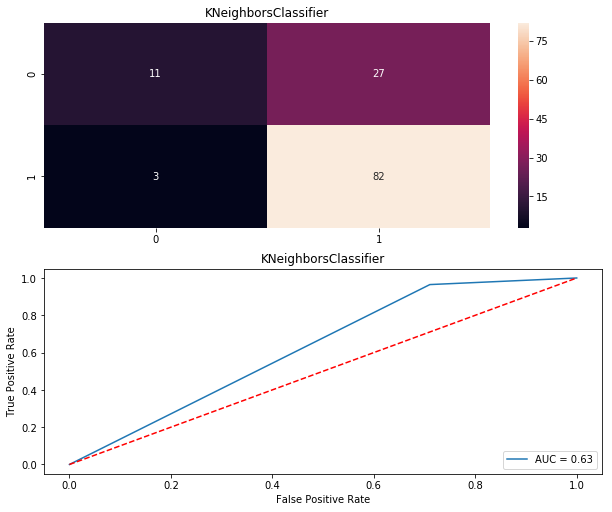

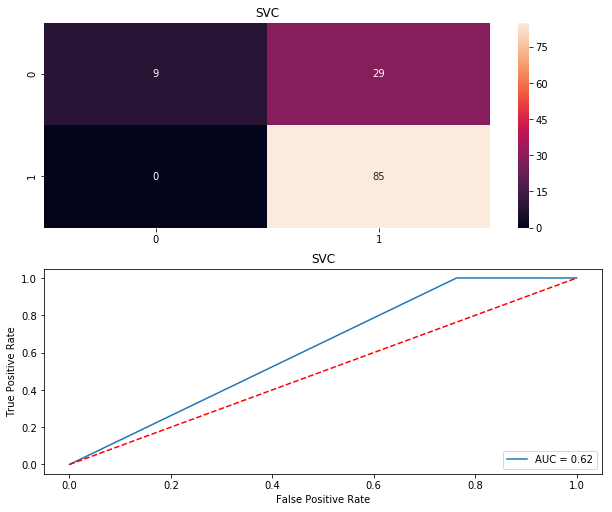

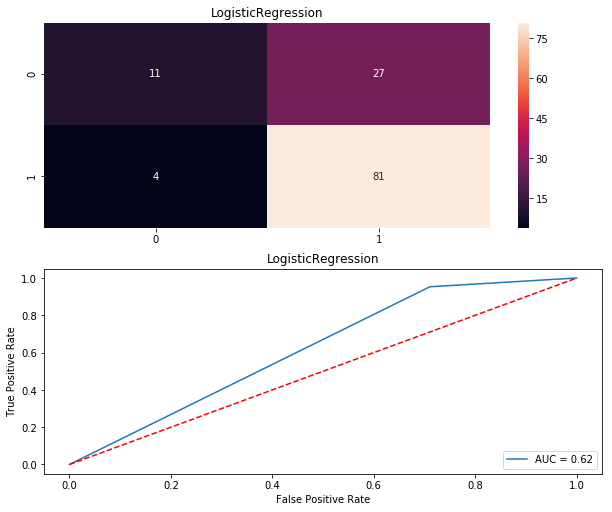

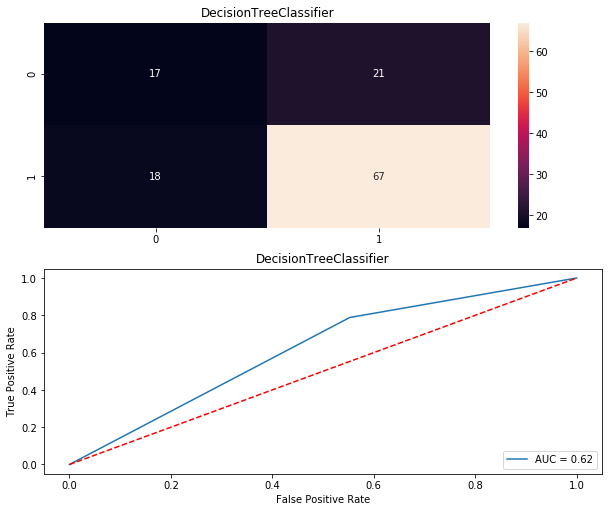

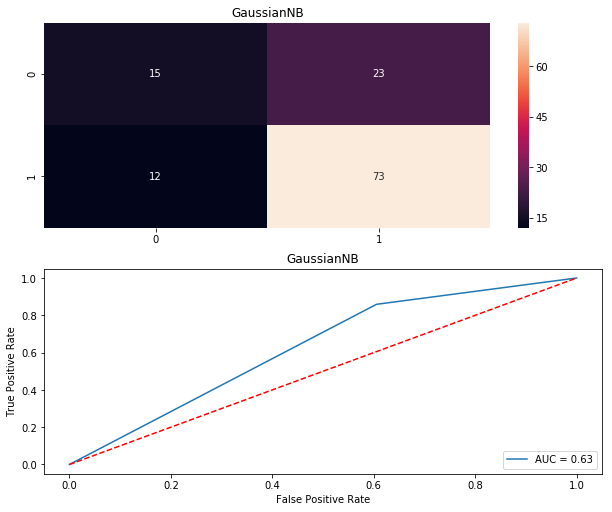

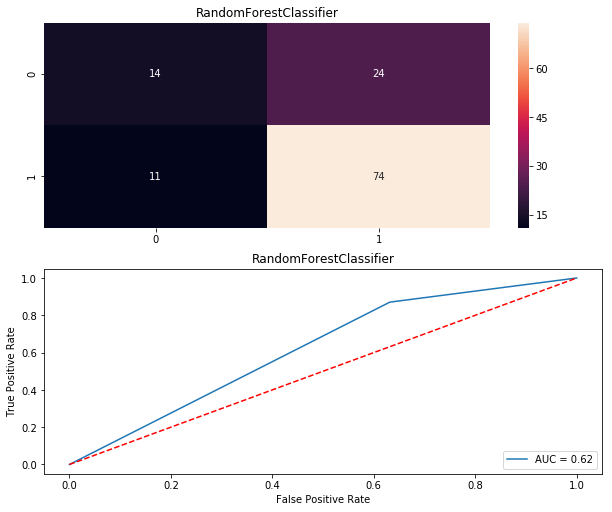

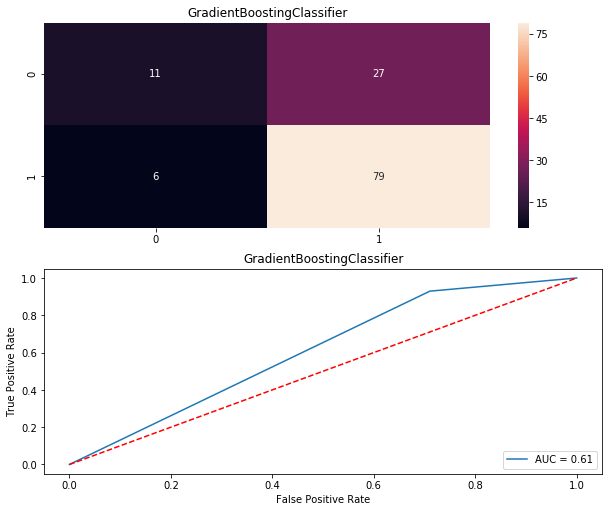

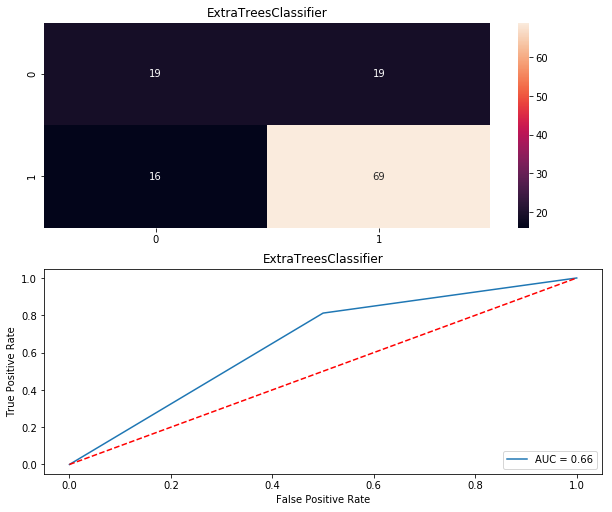

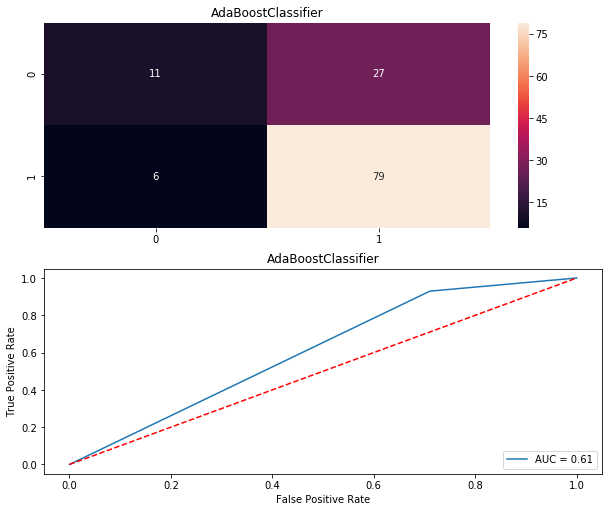

In [46]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [47]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,75.609756,77.850638,62.708978
1,SVC,76.422764,79.802238,61.842105
2,LogisticRegression,74.796748,79.305230,62.120743
3,DecisionTreeClassifier,68.292683,68.251366,61.780186
4,GaussianNB,71.544715,75.248504,62.678019
5,RandomForestClassifier,71.544715,72.123341,61.950464
6,GradientBoostingClassifier,73.170732,75.407234,60.944272
7,ExtraTreesClassifier,71.544715,71.610721,65.588235
8,AdaBoostClassifier,73.170732,74.587562,60.944272


# Second way

# Drop the missing value

In [48]:
df1=pd.read_csv('loan_prediction.csv')

In [49]:
df1.dropna(inplace=True)

In [50]:
df1.shape

(480, 13)

In [51]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [52]:
df1.drop(['Loan_ID'],axis=1,inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Married']=le.fit_transform(df1['Married'])
df1['Gender']=le.fit_transform(df1['Gender'])
df1['Education']=le.fit_transform(df1['Education'])
df1['Self_Employed']=le.fit_transform(df1['Self_Employed'])
df1['Loan_Status']=le.fit_transform(df1['Loan_Status'])

In [54]:
df1= pd.get_dummies(df1, drop_first=True)

In [55]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1


In [56]:
x=df1.drop(['Loan_Status'],axis=1)
x.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0,0,1


In [57]:
y=df1['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Accuracy_score =  0.6770833333333334


Cross_Val_Score =  0.6478569619337096


roc_auc_score =  0.5742424242424242


classification_report
               precision    recall  f1-score   support

           0       0.47      0.30      0.37        30
           1       0.73      0.85      0.78        66

   micro avg       0.68      0.68      0.68        96
   macro avg       0.60      0.57      0.58        96
weighted avg       0.65      0.68      0.65        96



[[ 9 21]
 [10 56]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=Fals

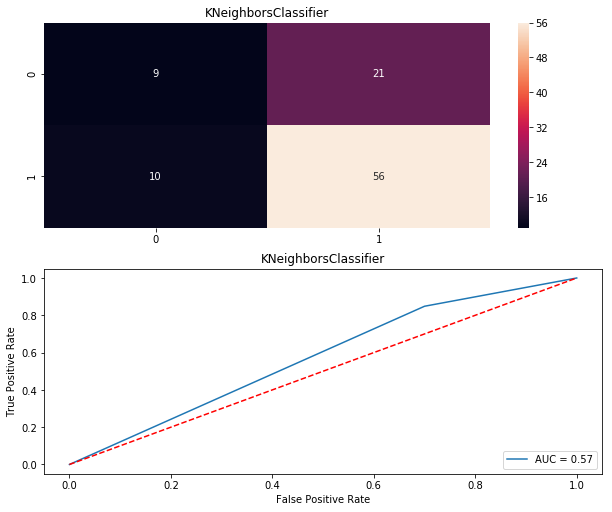

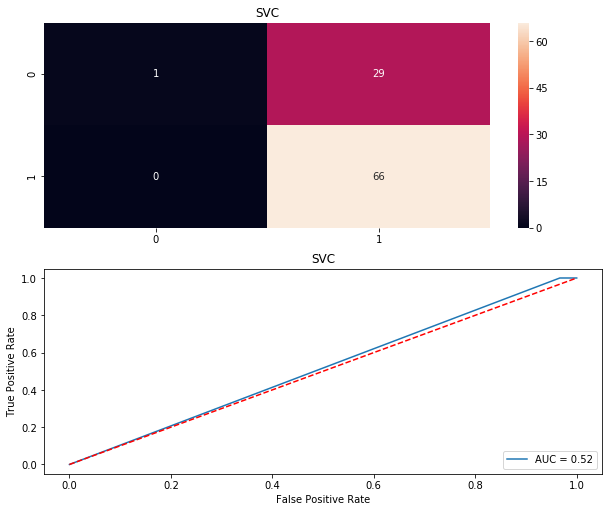

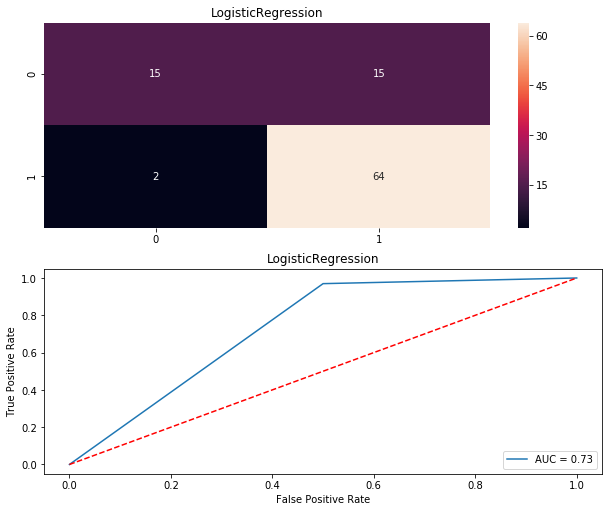

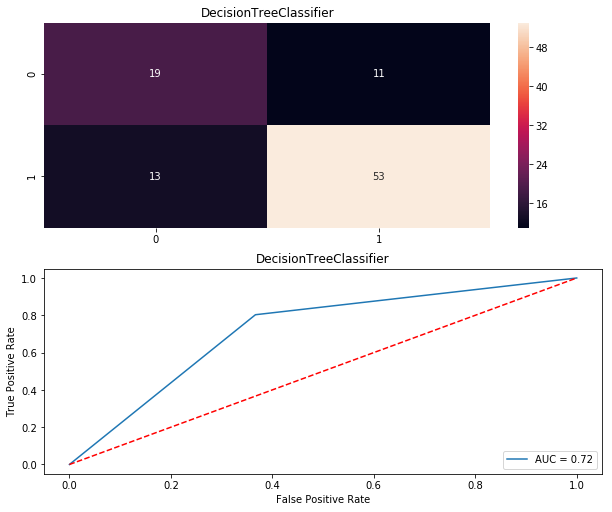

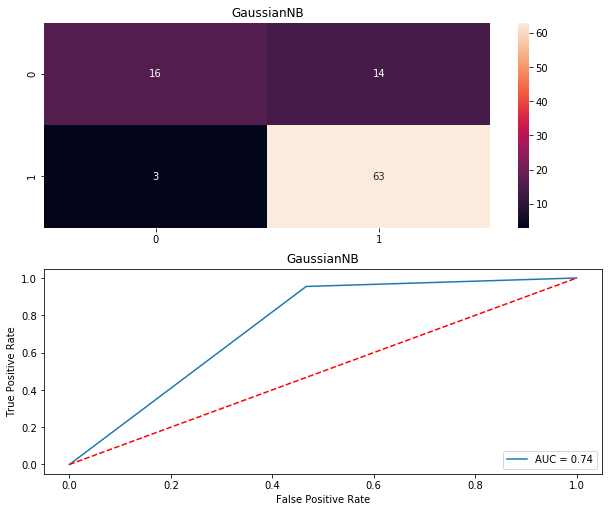

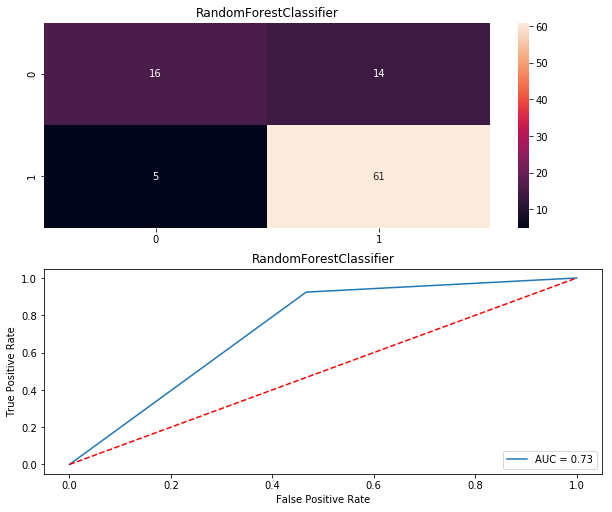

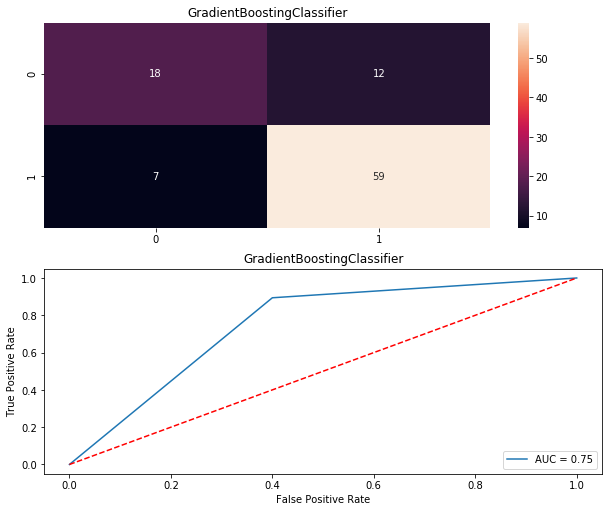

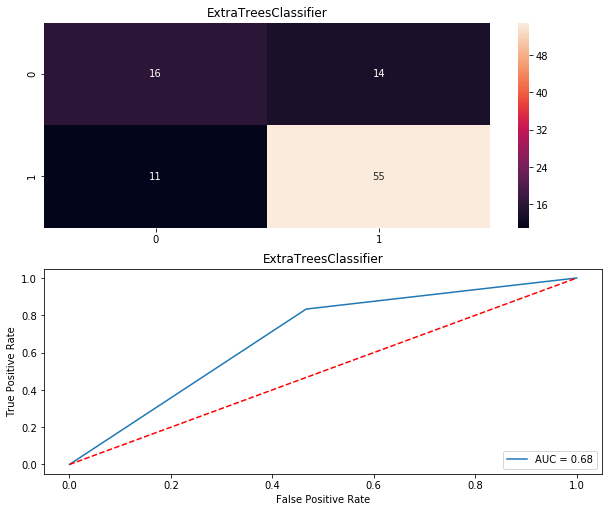

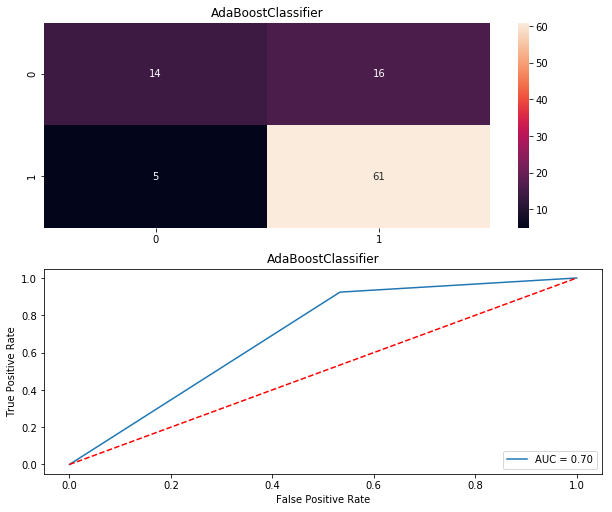

In [59]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [60]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,67.708333,64.785696,57.424242
1,SVC,69.791667,69.586771,51.666667
2,LogisticRegression,82.291667,81.042662,73.484848
3,DecisionTreeClassifier,75.000000,71.453448,71.818182
4,GaussianNB,82.291667,78.537867,74.393939
5,RandomForestClassifier,80.208333,75.820307,72.878788
6,GradientBoostingClassifier,80.208333,78.559488,74.696970
7,ExtraTreesClassifier,73.958333,71.913537,68.333333
8,AdaBoostClassifier,78.125000,78.333786,69.545455


**I choose GradientBoostingClassifier as my final model because it perform very well on your dataset**

Accuracy_score = 80.208333

Cross_val_score = 78.559488

Roc_auc_curve = 74.696970

In [61]:
from sklearn.externals import joblib

In [62]:
joblib.dump(GBC,'Model_FraudLonePrediction.csv')

['Model_FraudLonePrediction.csv']

In [63]:
model=joblib.load('Model_FraudLonePrediction.csv')

In [64]:
model.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1])